In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].apply(lambda x: iris.target_names[x])

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object

In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

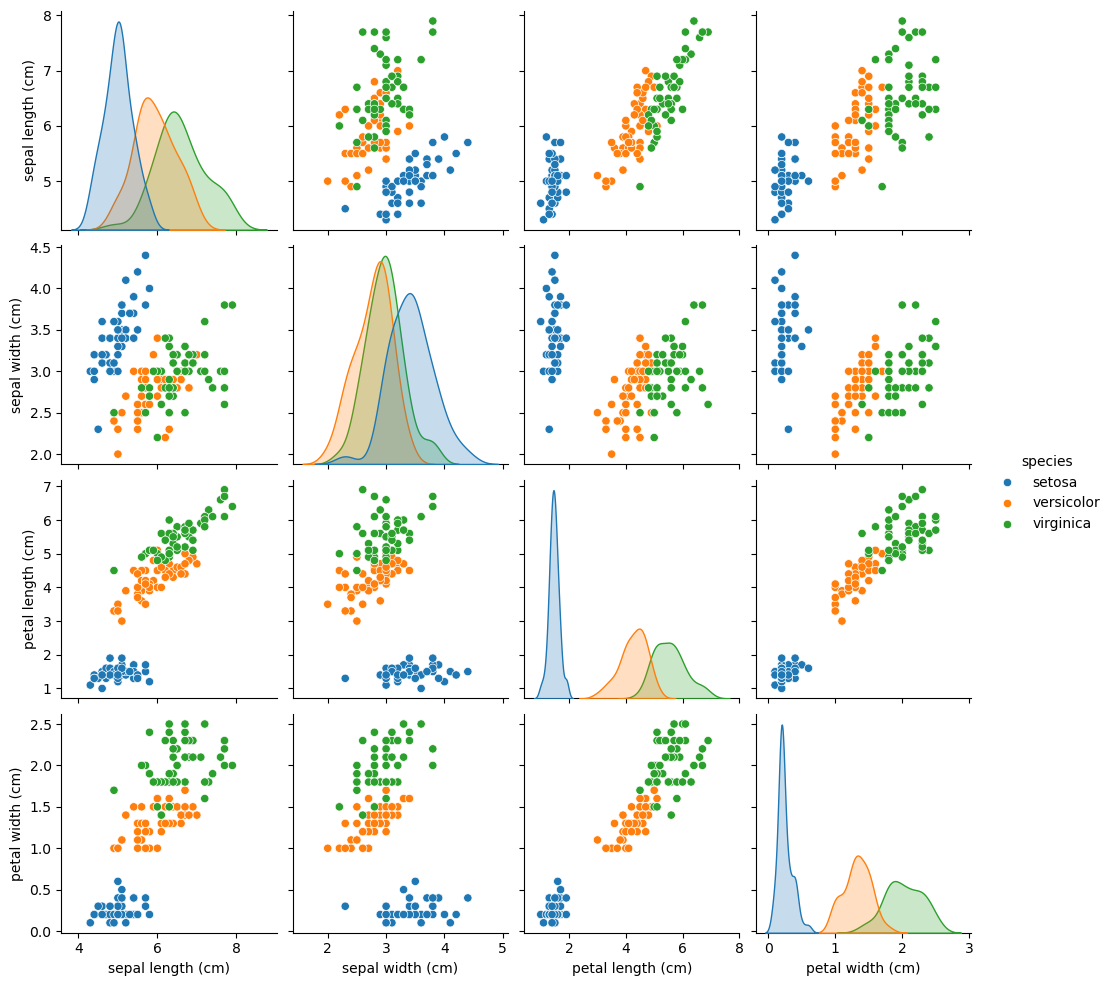

In [7]:
sns.pairplot(df, hue='species')
plt.show()

In [9]:
X = df.drop('species', axis=1)
y = df['species']


In [10]:
X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [12]:
y.shape

(150,)

In [13]:
le = LabelEncoder()
y = le.fit_transform(y) 

In [14]:
y.shape

(150,)

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [19]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [20]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [21]:
y_test.shape

(30,)

In [22]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)


LogisticRegression()

In [23]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [24]:
svm_model = SVC()
svm_model.fit(X_train, y_train)


SVC()

In [25]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()


Logistic Regression
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



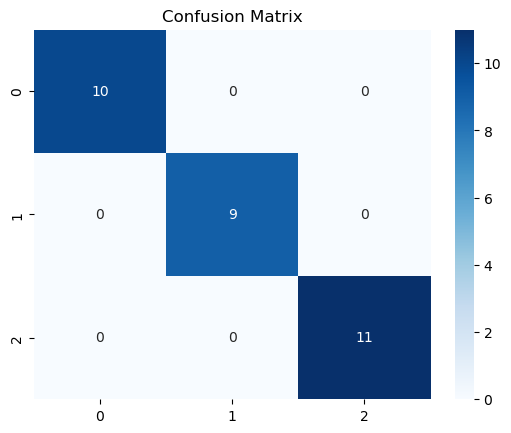

Random Forest
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



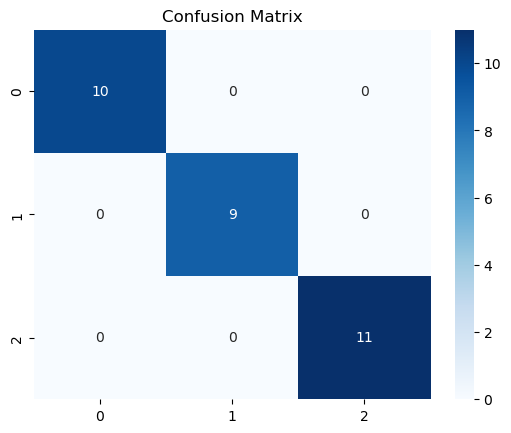

SVM
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



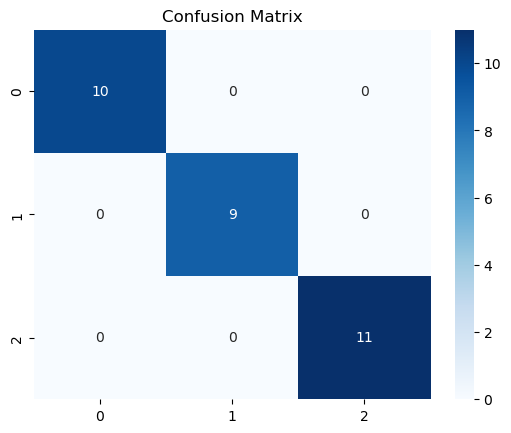

In [26]:
print("Logistic Regression")
evaluate_model(log_model, X_test, y_test)

print("Random Forest")
evaluate_model(rf_model, X_test, y_test)

print("SVM")
evaluate_model(svm_model, X_test, y_test)


In [27]:
import joblib


joblib.dump(rf_model, 'iris_model.pkl')


['iris_model.pkl']

In [30]:
model = joblib.load('iris_model.pkl')

sample = [[2.1, 1.5, 1.4, 0.1]]  
prediction = model.predict(sample)
print("Predicted Species:", iris.target_names[prediction[0]])


Predicted Species: setosa


D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [32]:
model = joblib.load('iris_model.pkl')

sample = [[6.0, 2.9, 4.3, 1.3]] 
prediction = model.predict(sample)
print("Predicted Species:", iris.target_names[prediction[0]])

Predicted Species: versicolor


D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [33]:
model = joblib.load('iris_model.pkl')

sample = [[6.3, 3.3, 6.0, 2.5]] 
prediction = model.predict(sample)
print("Predicted Species:", iris.target_names[prediction[0]])

Predicted Species: virginica


D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [34]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [35]:
model = joblib.load('iris_model.pkl')

sample = [[7, 3, 5.5, 2.5]] 
prediction = model.predict(sample)
print("Predicted Species:", iris.target_names[prediction[0]])

Predicted Species: virginica


D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


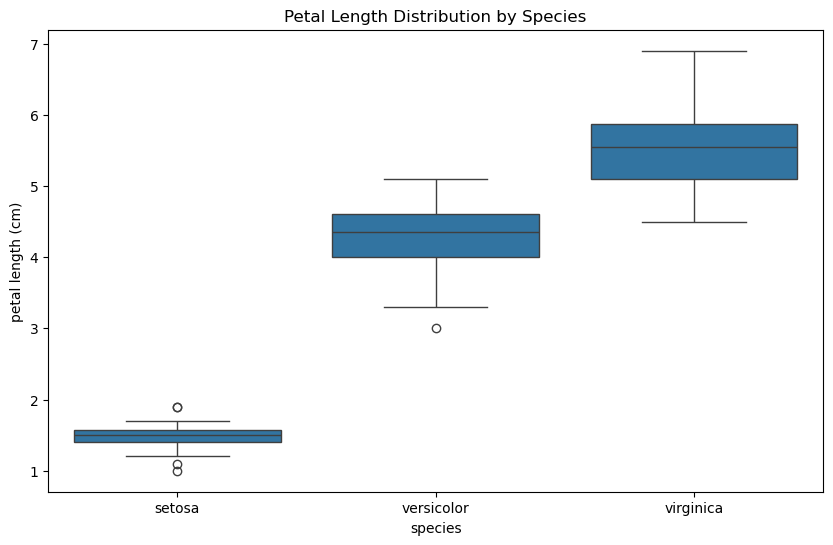

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='species', y='petal length (cm)')
plt.title('Petal Length Distribution by Species')
plt.show()


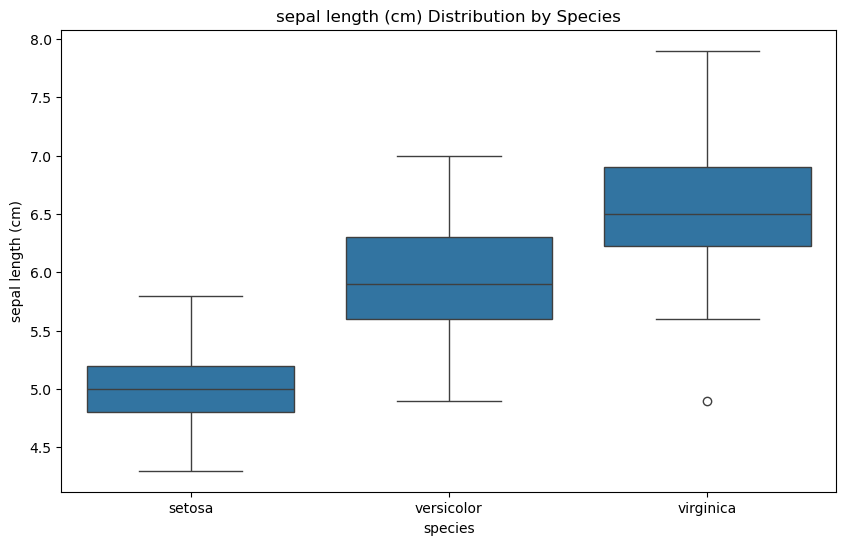

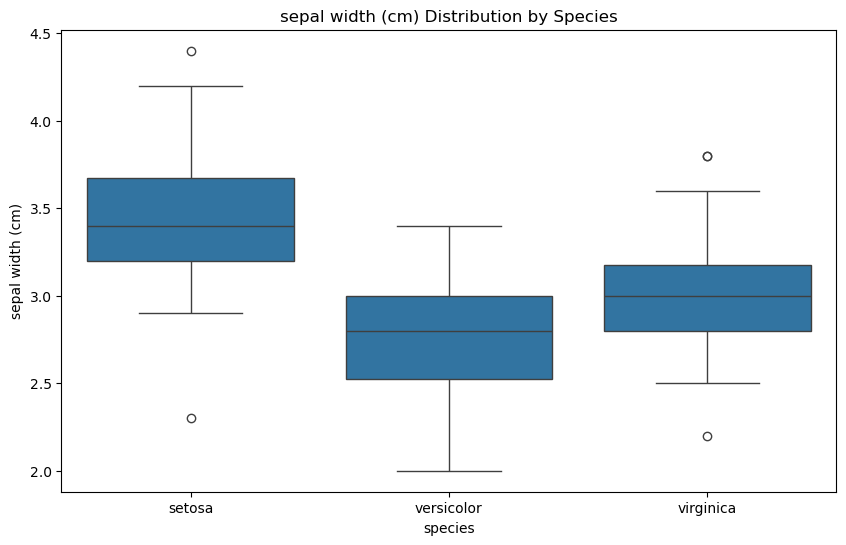

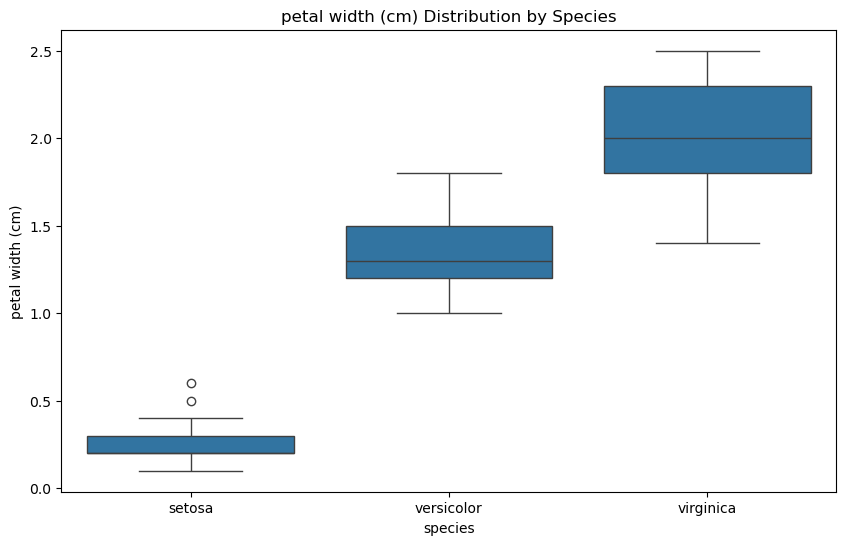

In [37]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='species', y=feature)
    plt.title(f'{feature} Distribution by Species')
    plt.show()


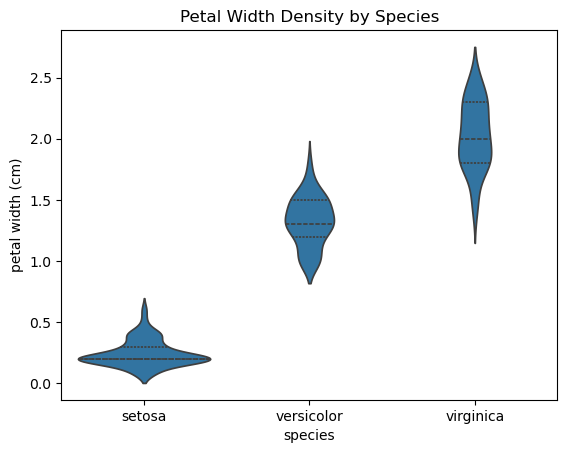

In [38]:
sns.violinplot(x='species', y='petal width (cm)', data=df, inner='quartile')
plt.title("Petal Width Density by Species")
plt.show()


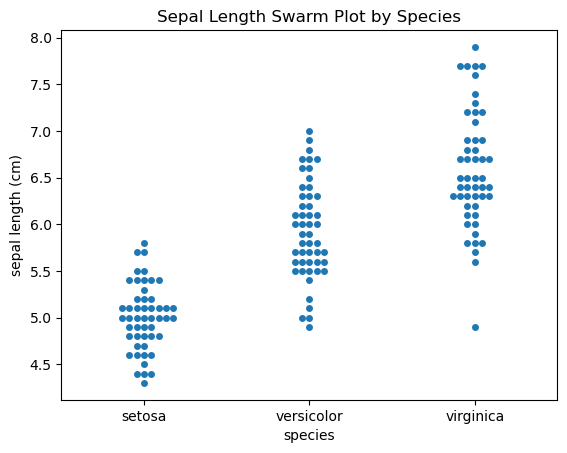

In [39]:
sns.swarmplot(x='species', y='sepal length (cm)', data=df)
plt.title("Sepal Length Swarm Plot by Species")
plt.show()


In [42]:


sample = [[3.4, 3, 1.5, 1.3]] 
prediction = model.predict(sample)
print("Predicted Species:", iris.target_names[prediction[0]])

Predicted Species: setosa


D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


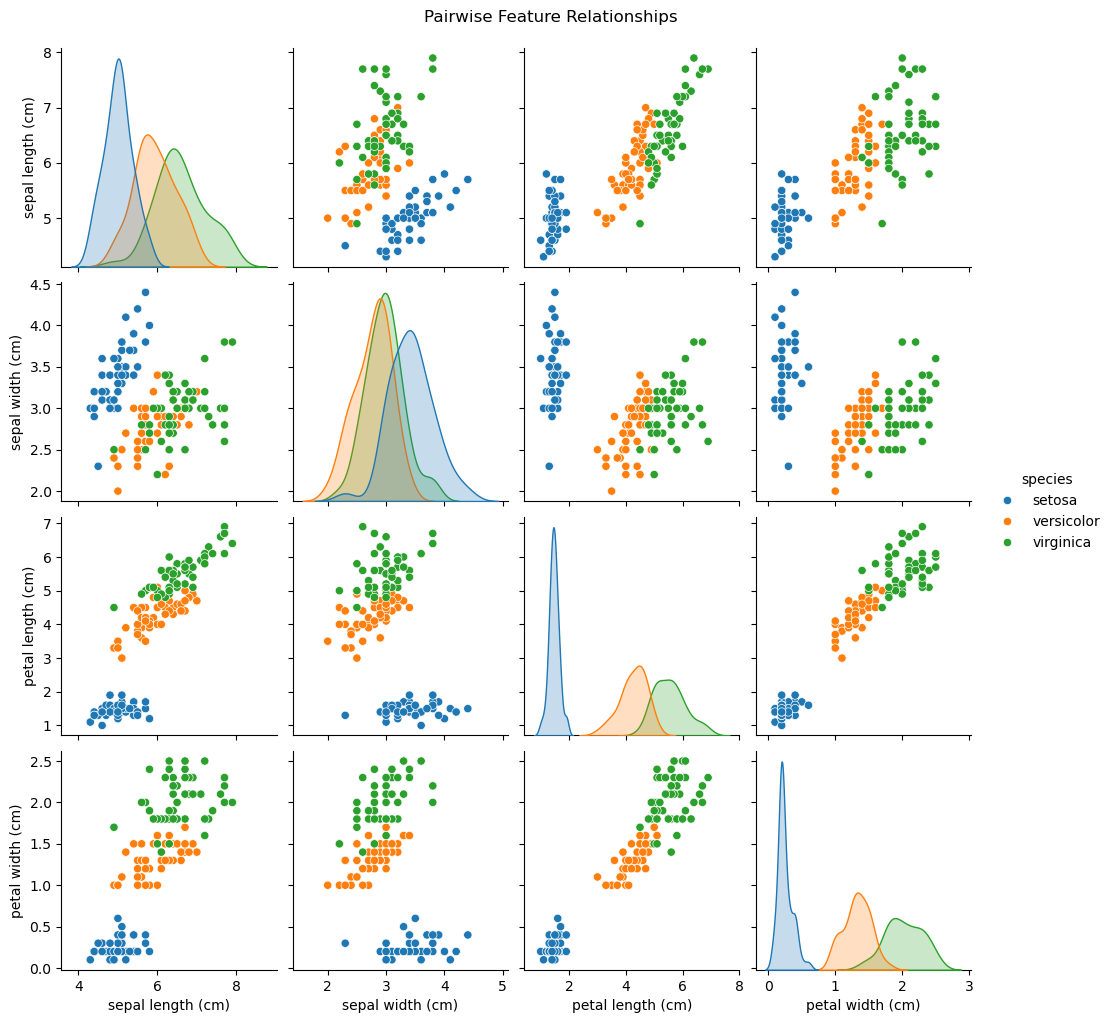

In [43]:
sns.pairplot(df, hue='species', diag_kind='kde')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


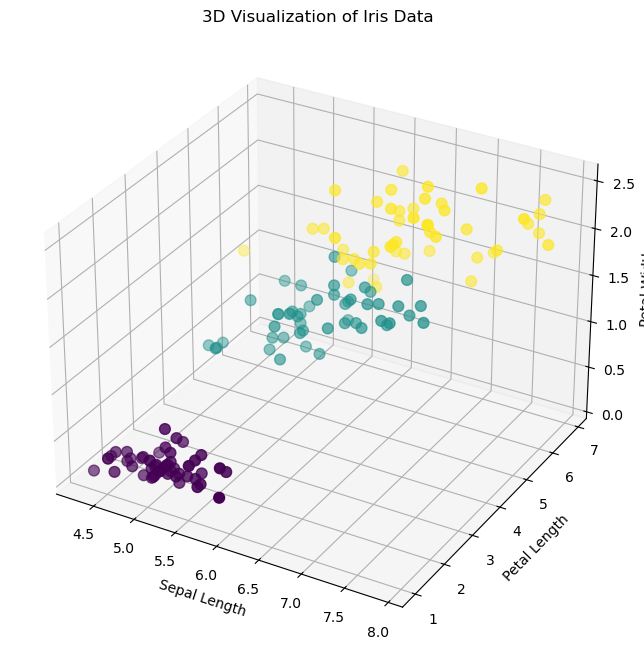

In [44]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

species_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
colors = ['red', 'green', 'blue']
df['species_num'] = df['species'].map(species_map)

ax.scatter(df['sepal length (cm)'], df['petal length (cm)'], df['petal width (cm)'],
           c=df['species_num'], cmap='viridis', s=60)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Petal Width')
plt.title("3D Visualization of Iris Data")
plt.show()


In [45]:
def predict_species(model, sample):
    prediction = model.predict([sample])[0]  
    predicted_species = le.inverse_transform([prediction])[0]  # Converts back to name
    print(f"Predicted Class: {prediction} -> Species: {predicted_species}")


In [46]:
predict_species(log_model, [5.1, 3.5, 1.4, 0.2])  


Predicted Class: 0 -> Species: setosa


D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [47]:
sample = [5.1, 3.5, 1.4, 0.2]  
prediction_log = log_model.predict([sample])
print("Logistic Regression Prediction:", prediction_log[0])  

Logistic Regression Prediction: 0


D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [48]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [49]:
sample = [6.0, 2.9, 4.3, 1.3]  
prediction_rf = rf_model.predict([sample])
print("Random Forest Prediction:", prediction_rf[0])


Random Forest Prediction: 1


D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [50]:
sample = [6.3, 3.3, 6.0, 2.5]  
prediction_rf = rf_model.predict([sample])
print("Random Forest Prediction:", prediction_rf[0])

Random Forest Prediction: 2


D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
